## Part1: Data visualization

### Step 1: Import pandas, numpy, datasets from sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

### Step 2: Load diabetes dataset

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

### Step 3: Read data description
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

### Step 4: Convert data to a DataFrame

In [3]:
col = ['Age','Sex','BMI','BP','S1','S2','S3','S4','S5','S6']
df = pd.DataFrame(data=diabetes_X, columns=col)
df['DiseaseProg'] = diabetes_y
df.head()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6,DiseaseProg
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Step 5: Visualize distribution of input features and the response variable

In [4]:
print(df.shape)
print(df.describe())

(442, 11)
                Age           Sex           BMI            BP            S1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 S2            S3            S4            S5            S6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16   
std    4.761905e-02  4.761905e-02  4.7619

<AxesSubplot:>

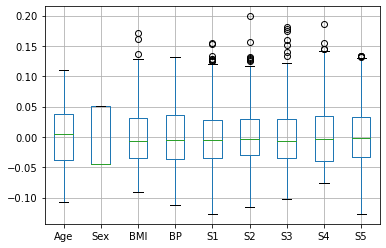

In [5]:
df[df.columns[0:-2]].boxplot()

<AxesSubplot:>

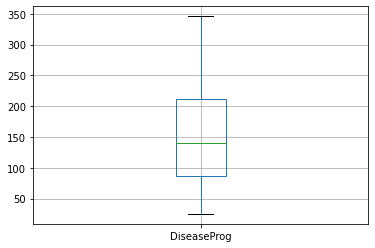

In [6]:
df[[df.columns[-1]]].boxplot()

### Step 6: Visualize correlations between input features and the response variable

In [7]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(9, 9), diagonal="kde");

print(df.corr())

                  Age       Sex       BMI        BP        S1        S2  \
Age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
Sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
BMI          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
BP           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
S1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
S2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
S3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
S4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
S5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
S6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
DiseaseProg  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   S3        S4        S5        S6  DiseaseProg  
Age         -0.075181  0.203841 

## Part 2: Machine Learning - A simple linear model

### Step 7:  Fit a linear regression line using the two "best" features (in terms of univariate correlations), with 70%/30% train/test split

#### Step 7.1:  Import packages

In [8]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

#### Step 7.2:  Select X and y

In [9]:
X = np.array(df[['BMI','S5']])
y = np.array(df[['DiseaseProg']])

#### Step 7.3: Create train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 2)
(133, 2)
(309, 1)
(133, 1)


#### Step 7.4: Create model, train it, apply it

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#### Step 7.5: Evaluate the model

In [12]:
print('Coefficients: \n', regr.coef_)

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Coefficients: 
 [[604.98229854 660.7152606 ]]
MAE: 43.90204303261304
MSE: 2867.83871906045
RMSE: 53.552205548048626


#### Step 7.6: Plot the predictions

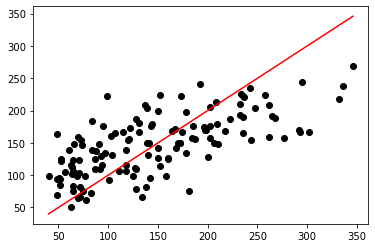

In [13]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()

### Step 8:  Fit a linear regression line using the single "best" feature (in terms of univariate correlations), with 70%/30% train/test split. Show the scatter plot and the regression line for the testing sample

#### Step 8.1-6: Repeat previous steps with a single var

In [14]:
X = np.array(df[['BMI']])
y = np.array(df[['DiseaseProg']])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Coefficients: 
 [[895.08229306]]
MAE: 46.67311015502046
MSE: 3114.1285454435188
RMSE: 55.804377475638226


#### Step 8.6: Plot the regression between X and y

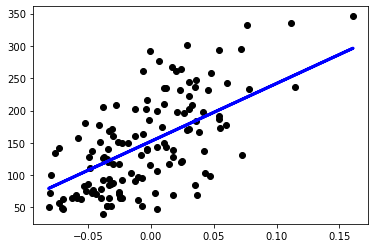

In [15]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

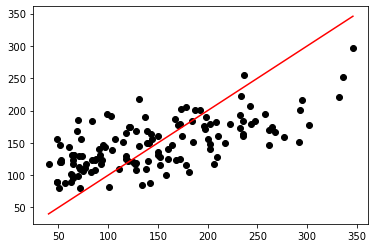

In [16]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()

### Step 9:  Fit a linear regression line using the single "best" feature (in terms of univariate correlations), with 70%/30% train/test split. Show the scatter plot and the regression line for the "training" sample

#### Step 9.1-6: Repeat previous steps applying the model on training samples

Coefficients: 
 [[895.08229306]]
MAE: 54.49781738576178
MSE: 4234.321210201652
RMSE: 65.07166211340888


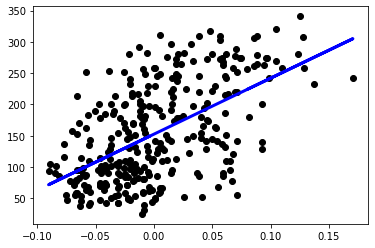

In [17]:
X = np.array(df[['BMI']])
y = np.array(df[['DiseaseProg']])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)

print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_pred, color='blue', linewidth=3)

plt.show()

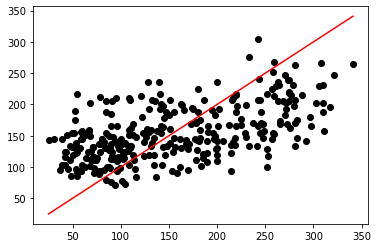

In [18]:
plt.scatter(y_train, y_pred,  color='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.show()

### Step 10:  Fit a linear regression line using all features, with 70%/30% train/test split

#### Step 10.1-6: Repeat previous steps using all features

In [19]:
X = np.array(df[df.columns[0:-1]])
y = np.array(df[['DiseaseProg']])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Coefficients: 
 [[   4.54739683 -289.61536198  430.7694691   421.34179482 -852.7858839
   495.08568641  151.08232973  246.09212835  781.00015128   44.82215124]]
MAE: 43.68985512129273
MSE: 2963.3688363116303
RMSE: 54.4368334522833


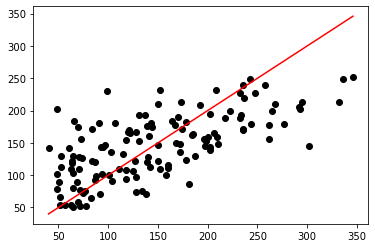

In [20]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()

## Part 3: Machine Learning - Random Forest model

### Step 11: Apply a random forest instead of linear regression

#### Step 11.1-6: Repeat previous steps using a random forest regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
X = np.array(df[df.columns[0:-1]])
y = np.array(df[['DiseaseProg']])

MAE: 43.68985512129273
MSE: 2963.3688363116303
RMSE: 54.4368334522833


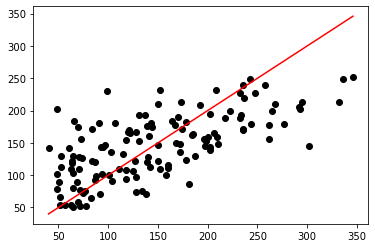

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

regr = RandomForestRegressor()
regr.fit(X_train, y_train.squeeze())
y_pred2 = regr.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred,  color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()